In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd gdrive/My\ Drive/課程/02_深度學習與電腦視覺馬拉松/05_實際操作

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import time
img_path = 'lena.png'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/課程/02_深度學習與電腦視覺馬拉松/05_實際操作


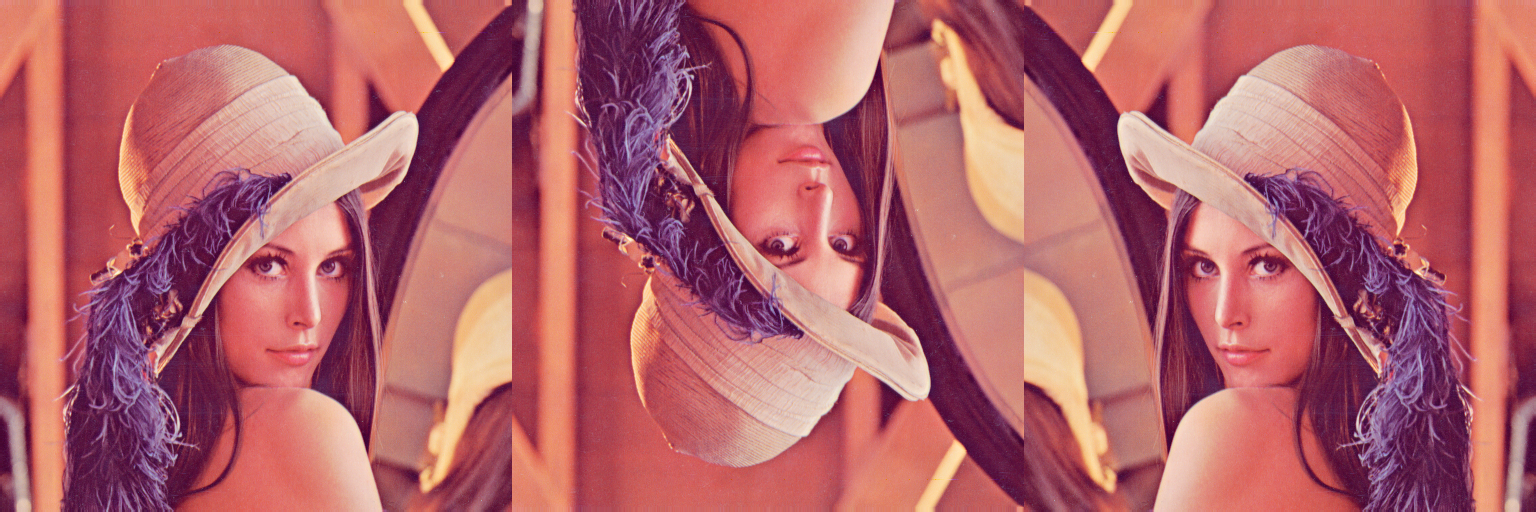

In [9]:
img = cv2.imread(img_path)

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img[:,::-1, :]

# 組合 + 顯示圖片
combine = np.hstack((img, img_vflip, img_hvflip))
cv2_imshow(combine)

INTER_NEAREST zoom cost 0.0015094280242919922
INTER_CUBIC zoom cost 0.0028047561645507812


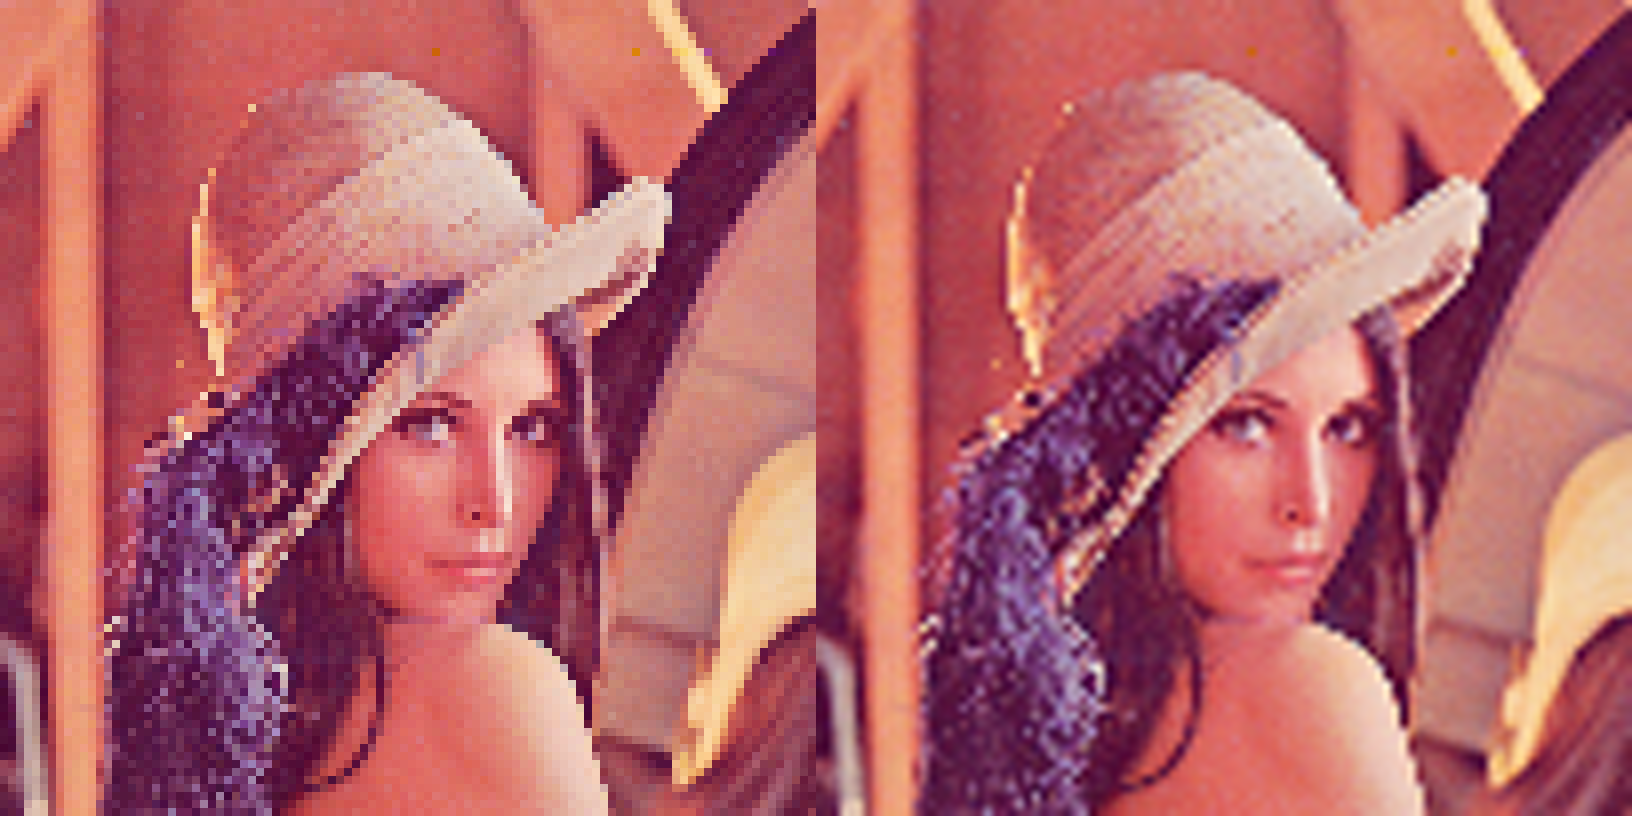

In [10]:
img = cv2.imread(img_path)

# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
combine = np.hstack((img_area_scale, img_cubic_scale))
cv2_imshow(combine)

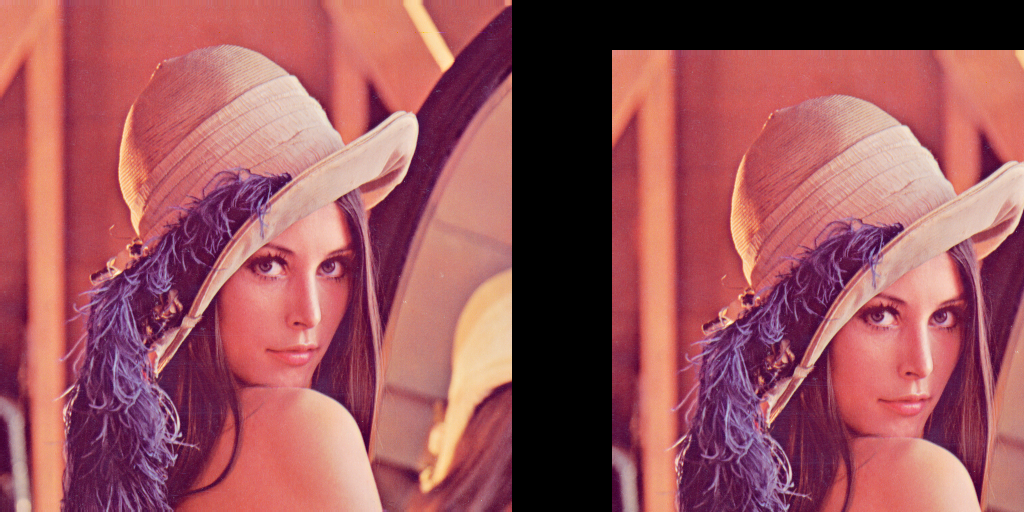

In [8]:
img = cv2.imread(img_path)

# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
combine = np.hstack((img, shift_img))
cv2_imshow(combine)

In [7]:
img.shape

(512, 512, 3)